In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.layers import Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import SimpleRNN, Input, Dense,LSTM , GRU
from tensorflow.keras.optimizers import Adam
from keras.layers import LeakyReLU
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras import regularizers

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
Y = pd.read_csv('/content/drive/MyDrive/AI3RobotProject/input.csv' , header=None)
X = pd.read_csv('/content/drive/MyDrive/AI3RobotProject/output.csv' , header=None)

In [18]:
Y.rename(columns = { 0:'theta 1', 1:'theta 2', 2:'theta 3', 3:'theta 4', 4:'theta 5', 5:'theta 6', 6:'theta 7'}, inplace = True)
Y.head()

,theta 1,theta 2,theta 3,theta 4,theta 5,theta 6,theta 7
0,-2.85,-1.85,-2.85,-3.0,-2.85,0.0,-2.850000
1,-2.85,-1.85,-2.85,-3.0,-2.85,0.0,-2.035714
2,-2.85,-1.85,-2.85,-3.0,-2.85,0.0,-1.221429
3,-2.85,-1.85,-2.85,-3.0,-2.85,0.0,-0.407143
4,-2.85,-1.85,-2.85,-3.0,-2.85,0.0,0.407143


In [19]:
X.rename(columns = { 0:'x', 1:'y', 2:'z', 3:'phi', 4:'psi', 5:'gamma'}, inplace = True)
X.head()

,x,y,z,phi,psi,gamma
0,-0.031002,0.051451,0.044041,-0.778648,1.282829,-2.098064
1,-0.031002,0.051451,0.044041,0.035638,1.282829,-2.098064
2,-0.031002,0.051451,0.044041,0.849924,1.282829,-2.098064
3,-0.031002,0.051451,0.044041,1.664209,1.282829,-2.098064
4,-0.031002,0.051451,0.044041,2.478495,1.282829,-2.098064


In [20]:
X_mean = np.mean(X, axis=0)
X_std = np.std(X, axis=0)
X = (X - X_mean) / X_std
print(X)
print(X.shape)

               x         y         z       phi       psi     gamma
0      -0.088969  0.147889 -1.215571 -0.429262  1.893835 -1.152854
1      -0.088969  0.147889 -1.215571  0.019647  1.893835 -1.152854
2      -0.088969  0.147889 -1.215571  0.468555  1.893835 -1.152854
3      -0.088969  0.147889 -1.215571  0.917464  1.893835 -1.152854
4      -0.088969  0.147889 -1.215571  1.366372  1.893835 -1.152854
...          ...       ...       ...       ...       ...       ...
719995 -2.272262  0.531074 -0.761656  1.650480 -1.625717 -1.286112
719996 -2.272262  0.531074 -0.761656 -1.364475 -1.625717 -1.286112
719997 -2.272262  0.531074 -0.761656 -0.915567 -1.625717 -1.286112
719998 -2.272262  0.531074 -0.761656 -0.466658 -1.625717 -1.286112
719999 -2.272262  0.531074 -0.761656 -0.017750 -1.625717 -1.286112

[720000 rows x 6 columns]
(720000, 6)


In [21]:
Y_mean = np.mean(Y, axis=0)
Y_std = np.std(Y, axis=0)
Y = (Y - Y_mean) / Y_std

In [22]:
X = X.values
Y = Y.values
print(X.shape)
print(Y.shape)

(720000, 6)
(720000, 7)


In [23]:
X = X.reshape(-1, 8, 6)
Y = Y.reshape(-1, 8, 7)
print(X.shape)
print(Y.shape)

(90000, 8, 6)
(90000, 8, 7)


In [24]:
X_train, X_test, Y_train,  Y_test = train_test_split( X, Y, test_size=0.3 )

In [35]:
modelRnn = Sequential()
modelRnn.add(SimpleRNN(128,activation='relu', return_sequences=True,  input_shape=( 8,6)))
modelRnn.add(SimpleRNN(128,activation='relu', return_sequences=True))
modelRnn.add(Dropout(0.2))
modelRnn.add(SimpleRNN(128,activation='relu', return_sequences=True))
modelRnn.add(SimpleRNN(128,activation='relu', return_sequences=True ))
modelRnn.add(Dense(7, activation='linear'))
modelRnn.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 8, 128)            17280     
                                                                 
 simple_rnn_11 (SimpleRNN)   (None, 8, 128)            32896     
                                                                 
 dropout_2 (Dropout)         (None, 8, 128)            0         
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, 8, 128)            32896     
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 8, 128)            32896     
                                                                 
 dense_3 (Dense)             (None, 8, 7)              903       
                                                                 
Total params: 116,871
Trainable params: 116,871
Non-tr

In [36]:
opt = Adam(lr = 'adaptive')
modelRnn.compile(optimizer = opt , loss = 'mean_absolute_error')

In [37]:
resultsRnn = modelRnn.fit(X_train, Y_train,batch_size= 128 ,epochs=1000, validation_data = (X_test, Y_test))

Epoch 1/1000
493/493 [==============================] - 23s 41ms/step - loss: 0.6233 - val_loss: 0.5663
Epoch 2/1000
493/493 [==============================] - 19s 39ms/step - loss: 0.5584 - val_loss: 0.5436
Epoch 3/1000
493/493 [==============================] - 20s 41ms/step - loss: 0.5369 - val_loss: 0.5213
Epoch 4/1000
493/493 [==============================] - 22s 44ms/step - loss: 0.5244 - val_loss: 0.5162
Epoch 5/1000
493/493 [==============================] - 19s 39ms/step - loss: 0.5154 - val_loss: 0.5024
Epoch 6/1000
493/493 [==============================] - 20s 41ms/step - loss: 0.5077 - val_loss: 0.4981
Epoch 7/1000
493/493 [==============================] - 19s 39ms/step - loss: 0.5029 - val_loss: 0.4913
Epoch 8/1000
493/493 [==============================] - 19s 39ms/step - loss: 0.4976 - val_loss: 0.4887
Epoch 9/1000
493/493 [==============================] - 19s 39ms/step - loss: 0.4935 - val_loss: 0.4839
Epoch 10/1000
493/493 [==============================] - 21s 42m

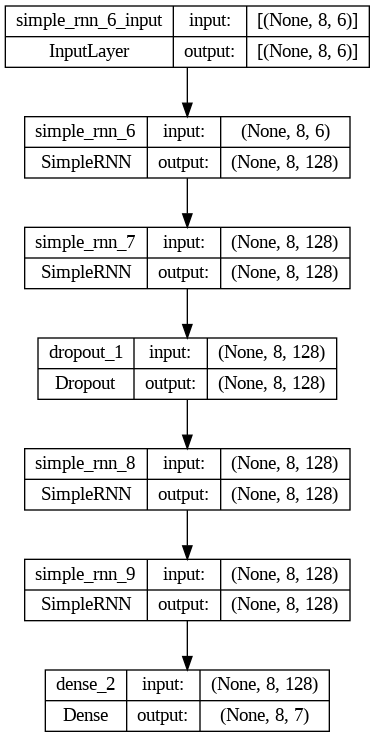

In [28]:
from tensorflow.keras.utils import plot_model
plot_model(modelRnn, show_shapes=True)

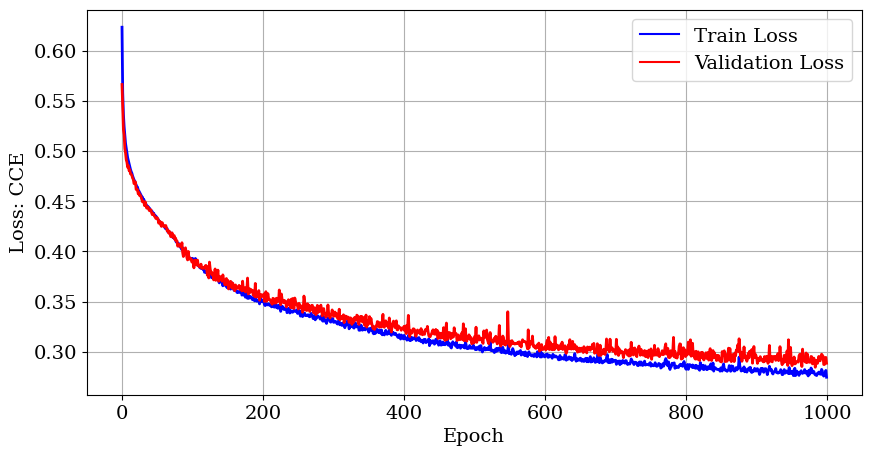

In [38]:
import matplotlib.pyplot as plt
import matplotlib

# Set the font family to serif
matplotlib.rcParams['font.family'] = 'serif'

# Set the desired fontsize
fontsize = 14

train_loss = resultsRnn.history['loss']
val_loss = resultsRnn.history['val_loss']

# Create a figure with two subplots
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

# Plot the train and validation loss in the top subplot
axs.plot(train_loss, label='Train Loss', color ='b')
axs.plot(val_loss, label='Validation Loss', color='r')

# Set the axis labels and title for the top subplot
axs.set_xlabel('Epoch', fontsize=fontsize)
axs.set_ylabel('Loss: CCE', fontsize=fontsize)
#axs[0].set_title('Training and Validation Loss', fontsize=fontsize)

# Set the legend and grid for the top subplot
axs.legend(fontsize=fontsize)
axs.grid(True)

# Set the tick labels fontsize for the top subplot
axs.tick_params(axis='both', which='major', labelsize=fontsize)

# Set the line colors and linewidths for the top subplot
axs.lines[0].set_linewidth(2)
axs.lines[1].set_linewidth(2)


# Show the plot
plt.show()

plt.show()